# Comparison of Heart Disease Classifiers

## Authors: Rayhaan Rasheed, Solomon, Sam

### Data: 
### Overview:

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [15]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
      
df = pd.read_csv(url, header = None)
df.columns =  ["age", "sex", "cp", "trestbps",
            "chol", "fbs", "restecg", "thalach",
            "exang","oldpeak", "slope", "ca", "thal", "target"]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Remove rows with missing values

In [16]:
import numpy as np

print('Number of rows before removing rows with missing values: ' + str(df.shape[0]))

# Replace ? with np.NaN
df = df.replace('?',np.NaN)

# Remove rows with np.NaN
df = df.dropna()

print('Number of rows after removing rows with missing values: ' + str(df.shape[0]))

Number of rows before removing rows with missing values: 303
Number of rows after removing rows with missing values: 297


#### Get the feature and target vector

In [17]:
# Specify the name of the target
target = 'target'

# Get the target vector
y = df[target]

# Specify the name of the features
features = list(df.drop(target, axis=1).columns)

# Get the feature vector

X = df[features]

In [18]:
#X = df.iloc[:, :-1].values
#y = df.iloc[:,-1:].values

### Preprocessing and Data Analysis:
* EDA
* Encode the ordinal data
* Separate features and target
* Split into test and train 
* Build simple logistic regression as our base

In [19]:
cont_features = ['age','trestbps','chol','thalach']
df_0 = df[df.target == 0]
df_1 = df[df.target == 1]
df_2 = df[df.target == 2]
df_3 = df[df.target == 3]
df_4 = df[df.target == 4]

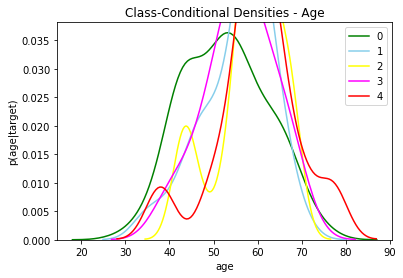

In [20]:
sns.distplot( df_0["age"] , color="green", label="0", hist=False)
sns.distplot( df_1["age"] , color="skyblue", label="1",hist=False)
sns.distplot( df_2["age"] , color="yellow", label="2",hist=False)
sns.distplot( df_3["age"] , color="magenta", label="3",hist=False)
sns.distplot( df_4["age"] , color="red", label="4",hist=False)
plt.legend()
plt.title("Class-Conditional Densities - Age")
plt.ylabel("p(age|target)")
plt.show()

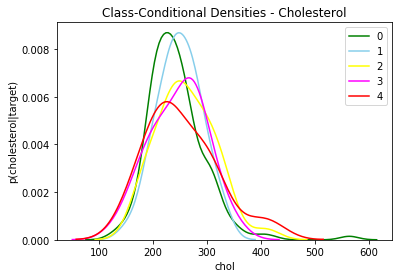

In [21]:
sns.distplot( df_0['chol'] , color="green", label="0", hist=False)
sns.distplot( df_1['chol'] , color="skyblue", label="1",hist=False)
sns.distplot( df_2['chol'] , color="yellow", label="2",hist=False)
sns.distplot( df_3['chol'] , color="magenta", label="3",hist=False)
sns.distplot( df_4['chol'] , color="red", label="4",hist=False)
plt.legend()
plt.title("Class-Conditional Densities - Cholesterol")
plt.ylabel("p(cholesterol|target)")
plt.show()

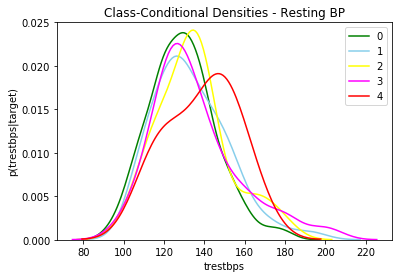

In [22]:
sns.distplot( df_0['trestbps'] , color="green", label="0", hist=False)
sns.distplot( df_1['trestbps'] , color="skyblue", label="1",hist=False)
sns.distplot( df_2['trestbps'] , color="yellow", label="2",hist=False)
sns.distplot( df_3['trestbps'] , color="magenta", label="3",hist=False)
sns.distplot( df_4['trestbps'] , color="red", label="4",hist=False)
plt.legend()
plt.title("Class-Conditional Densities - Resting BP")
plt.ylabel("p(trestbps|target)")
plt.show()

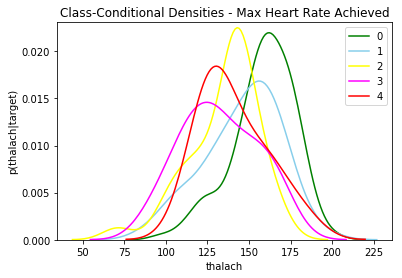

In [23]:
sns.distplot( df_0['thalach'] , color="green", label="0", hist=False)
sns.distplot( df_1['thalach'] , color="skyblue", label="1",hist=False)
sns.distplot( df_2['thalach'] , color="yellow", label="2",hist=False)
sns.distplot( df_3['thalach'] , color="magenta", label="3",hist=False)
sns.distplot( df_4['thalach'] , color="red", label="4",hist=False)
plt.legend()
plt.title("Class-Conditional Densities - Max Heart Rate Achieved")
plt.ylabel("p(thalach|target)")
plt.show()

In [24]:
print('The unique value in target dataset: ' + (', ').join([str(val) for val in np.unique(y)]))

The unique value in target dataset: 0, 1, 2, 3, 4


#### Divide the data into training and testing

In [25]:
from sklearn.model_selection import train_test_split

# Randomly choose 30% of the data for testing (set randome_state as 0 and stratify as y)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0, stratify=y)


#### Standardize Features

In [26]:
from sklearn.preprocessing import StandardScaler

# Declare the StandardScaler
std_scaler = StandardScaler()

# Standardize the features in the training data
X_train = std_scaler.fit_transform(X_train)

# Standardize the features in testing data

X_test = std_scaler.transform(X_test)

#### Feature importance using random forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Delcare the model
rf = RandomForestClassifier(random_state=0, class_weight='balanced')

# Train the model

rf.fit(X_train,y_train)
# Print the classification accuracy
print('The accuracy of random forest is: ' + str(rf.score(X_test, y_test)))

The accuracy of random forest is: 0.522222222222


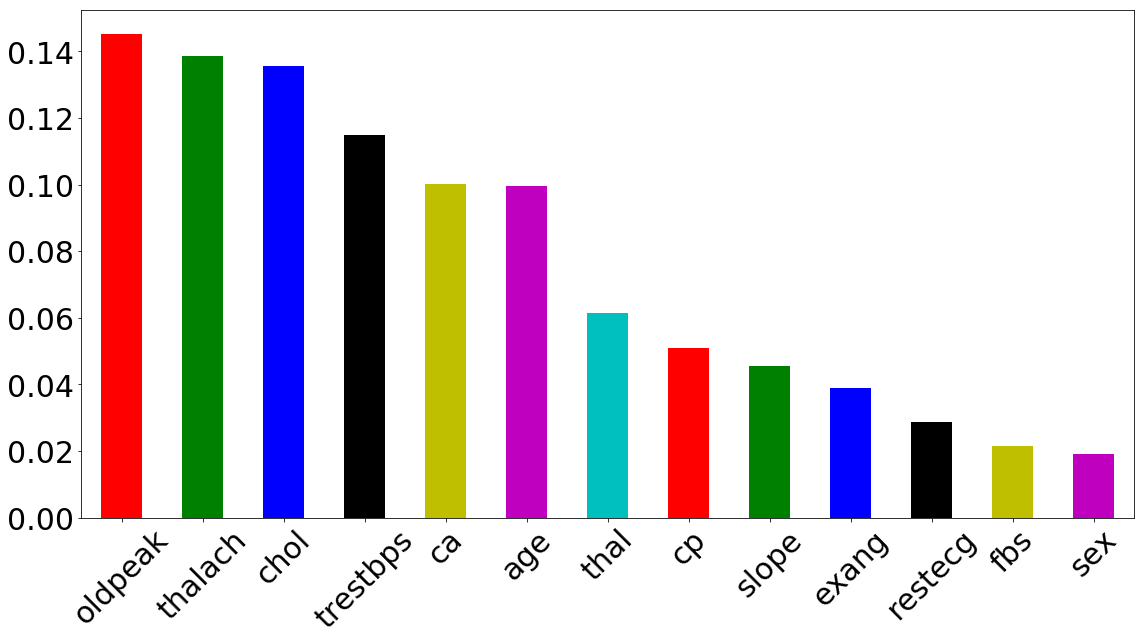

In [28]:
import matplotlib.pyplot as plt

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = f_importances = pd.Series(rf.feature_importances_, features)

# Sort the array in descending order of the importances
f_importances = f_importances.sort_values(ascending=False)

# Draw the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=30,color='rgbkymc')

# Show the plot
plt.tight_layout()
plt.show()

#### Top 6 features 

- Oldpeak(ST depression induced by exercise relative to rest)

- Thalach(maximum heart rate achieved)

- Chol(serum cholestoral in mg/dl)

- Trestbps(resting blood pressure)

- Ca(number of major vessels (0-3) colored by flourosopy)

- Age(age in years)